<a href="https://colab.research.google.com/github/yuzzaf/Course-Machine-Learning/blob/main/Week%206/k%20means%20clustering_using_book%20sellers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### NIM: 1103200082
### Name: Muhammad Yuzzaf Ibrahim Azzumarafi
### Class: TK-44-06

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

# Ganti path dengan lokasi dataset Anda di Google Drive setelah mounting
file_path = "/content/drive/MyDrive/Dataset/bestsellers with categories.csv"

# Membaca dataset ke dalam dataframe
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataframe
print(df.head())

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

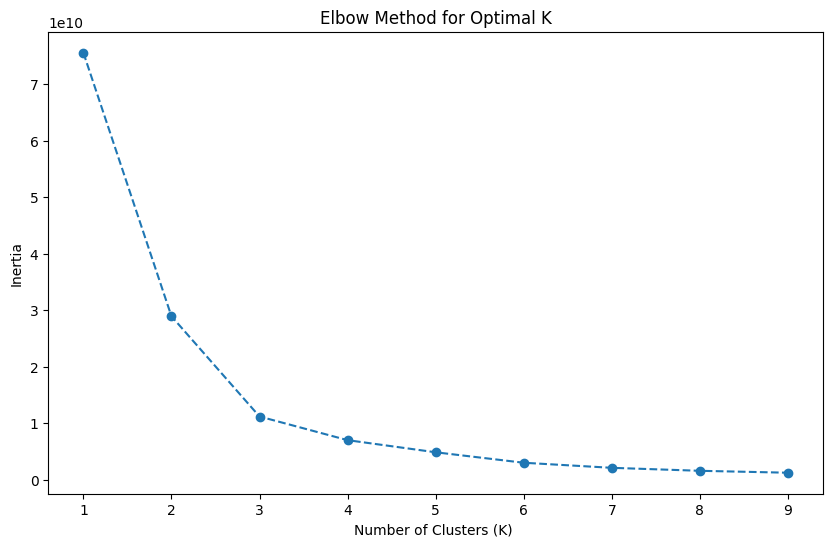

In [6]:
# Mengambil nilai yang akan digunakan untuk clustering
X = df[['User Rating', 'Reviews', 'Price']]

# Menentukan jumlah cluster yang dinginkan
max_k = 10
# Jumlah maksimum cluster yang akan diuji
inertia_values = []

# Menghitung inersia untuk setiap nilai K
for k in range(1, max_k):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(X)
  inertia_values.append(kmeans.inertia_)

# Membuat plot elbow
plt.figure (figsize=(10,6))
plt.plot(range(1, max_k), inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K) ')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


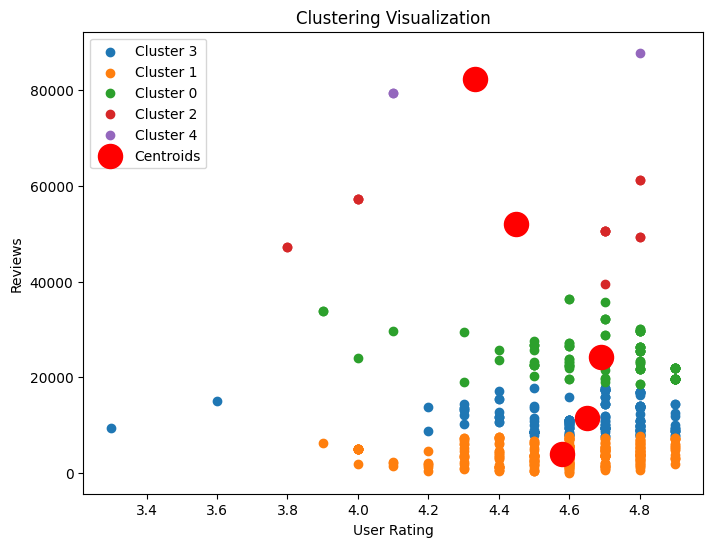

In [7]:
# Tentukan jumlah cluster
n_clusters = 5

# Buat model K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Lakukan clustering pada data
df['label'] = kmeans.fit_predict(X)

# Visualisasikan data berdasarkan label
plt.figure(figsize=(8, 6))
for label in df['label'].unique():
  plt.scatter(df[df['label'] == label]['User Rating'],
              df[df['label'] == label]['Reviews'],
              label=f'Cluster {label}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', label='Centroids')
plt.xlabel('User Rating')
plt.ylabel('Reviews')
plt.title('Clustering Visualization')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


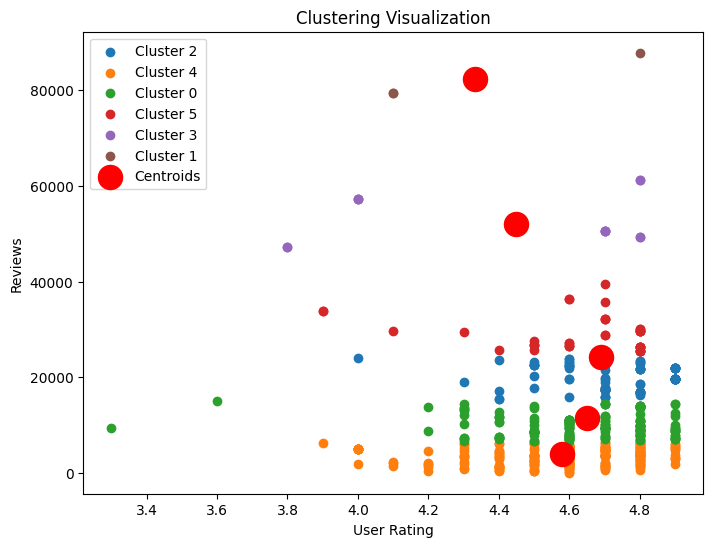

In [8]:
# Tentukan jumlah cluster
n_clusters = 6

# Buat model Means
means = KMeans(n_clusters=n_clusters, random_state=0)

# Lakukan clustering pada data dan tambahkan label ke dataframe
df['label'] = means.fit_predict(X)

# Visualisasikan data berdasarkan label
plt.figure(figsize=(8, 6))
for label in df['label'].unique():
  plt.scatter(df[df['label'] == label]['User Rating'],
              df[df['label'] == label]['Reviews'],
              label=f'Cluster {label}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', label='Centroids')
plt.xlabel('User Rating')
plt.ylabel('Reviews')
plt.title('Clustering Visualization')
plt.legend()
plt.show()

In [9]:
# Inisialisasi dictionary untuk menyimpan nilai silhouette score
silhouette_scores = {}

# Menghitung silhouette score untuk setiap nilai k dari 2 hingga 10
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state=0)
  labels = kmeans.fit_predict(X)
  silhouette_avg = silhouette_score(X, labels)
  silhouette_scores[k] = silhouette_avg

# Menampilkan nilai silhouette score untuk setiap nilai k
for k, silhouette_avg in silhouette_scores. items():
  print(f"Silhouette Score for k={k}: {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for k=2: 0.6848718423306879
Silhouette Score for k=3: 0.6972508989975392
Silhouette Score for k=4: 0.5893509527181041
Silhouette Score for k=5: 0.5931917216190198
Silhouette Score for k=6: 0.59181709129356
Silhouette Score for k=7: 0.598242989203645
Silhouette Score for k=8: 0.5683029671626013
Silhouette Score for k=9: 0.5721176354927326
Silhouette Score for k=10: 0.5765840332006933


In [10]:
# Inisialisasi dictionary untuk menyimpan nilai Davies-Bouldin Index
dbi_scores = {}

# Menghitung Davies-Bouldin Index untuk setiap nilai k dari 2 hingga 10
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state=0)
  labels = kmeans.fit_predict(X)
  dbi = davies_bouldin_score(X, labels)
  dbi_scores[k] = dbi

# Menampilkan nilai Davies-Bouldin Index untuk setiap nilai k
for k, dbi in dbi_scores.items():
  print(f"Davies-Bouldin Index for k={k}: {dbi}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for k=2: 0.5543304712933149
Davies-Bouldin Index for k=3: 0.40322550551414343
Davies-Bouldin Index for k=4: 0.49284158858675053
Davies-Bouldin Index for k=5: 0.43072722536094465
Davies-Bouldin Index for k=6: 0.4730295085171757
Davies-Bouldin Index for k=7: 0.4484109101154541
Davies-Bouldin Index for k=8: 0.4675862786559374
Davies-Bouldin Index for k=9: 0.46648217109193446
Davies-Bouldin Index for k=10: 0.4427375898500753


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
# Inisialisasi dictionary untuk menyimpan nilai Calinski-Harabasz Index
chi_scores = {}

# Menghitung Calinski-Harabasz Index untuk setiap nilai k dari 2 hingga 10
for k in range(2,11):
  kmeans = KMeans(n_clusters=k, random_state=0)
  labels = kmeans.fit_predict(X)
  chi = calinski_harabasz_score(X, labels)
  chi_scores[k] = chi

# Menampilkan nilai Calinski-Harabasz Index untuk setiap nilai k
for k, chi in chi_scores.items():
  print(f"Calinski-Harabasz Index for k={k}: {chi}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Calinski-Harabasz Index for k=2: 882.495885103724
Calinski-Harabasz Index for k=3: 1568.943722489486
Calinski-Harabasz Index for k=4: 1772.883913740665
Calinski-Harabasz Index for k=5: 1968.8927154875184
Calinski-Harabasz Index for k=6: 2596.6664546347824
Calinski-Harabasz Index for k=7: 3102.444056651066
Calinski-Harabasz Index for k=8: 3545.9089409587655
Calinski-Harabasz Index for k=9: 3942.4105533662714
Calinski-Harabasz Index for k=10: 4474.041682325849


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
